In [1]:
from cl_like import fisher
import numpy.linalg as LA 
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
F = fisher.Fisher('forecast.yml')

In [3]:
step = np.geomspace(1e-5,0.1,30)
parameters = ['sigma8','Omega_c','Omega_b','h','n_s']
FisherM = F.get_fisher(parameters,step_factor=step[0])
covar = LA.inv(FisherM)  # covariance matrix
np.sqrt(np.diag(covar))

array([0.00104159, 0.00480463, 0.00462979, 0.02890556, 0.00631736])

In [4]:
# first do the forecasting without bias parameters
parameters = ['sigma8','Omega_c','Omega_b','h','n_s']
step = np.geomspace(1e-5,0.1,30)
errs_wobias = np.zeros((len(step),len(parameters)))
for i,factor in tqdm(enumerate (step)):
    FisherM = F.get_fisher(parameters,step_factor=factor)
    covar = LA.inv(FisherM)  # covariance matrix
    errs_wobias[i] = np.sqrt(np.diag(covar))

30it [03:41,  7.38s/it]


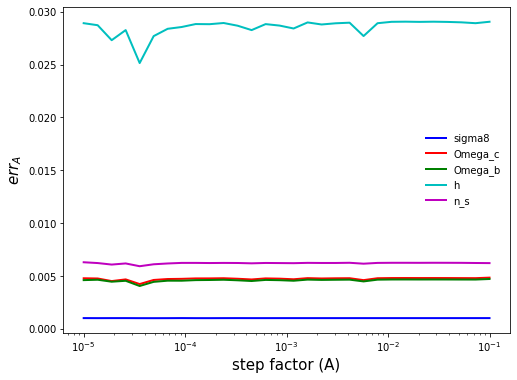

In [6]:
col=['b','r','g','c','m','y','black']
f1, axes = plt.subplots(1,1,sharex='all',figsize = (8,6))
for i,labels in enumerate(parameters):  
    axes.semilogx(step,errs_wobias[:,i],color=col[i],label=labels,linewidth = 2,ls = '-')
axes.legend(frameon = False)
axes.set_ylabel(r'${err_{A}}$',fontsize = 15)
axes.set_xlabel('step factor (A)',fontsize = 15);